# Project for Generative AI
## Comparing effect of DAE on Noise Profiles
## Adi Ghosh and Zahra Rahmani

### Load Library files

In [26]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist, fashion_mnist, cifar10
import numpy as np
import cv2

## MNIST

### Load Image Data

In [30]:
(MNIST_X_train, MNIST_y_train), (MNIST_X_test, MNIST_y_test) = mnist.load_data()
print(MNIST_X_train.shape)
print(MNIST_X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Plot Original Images

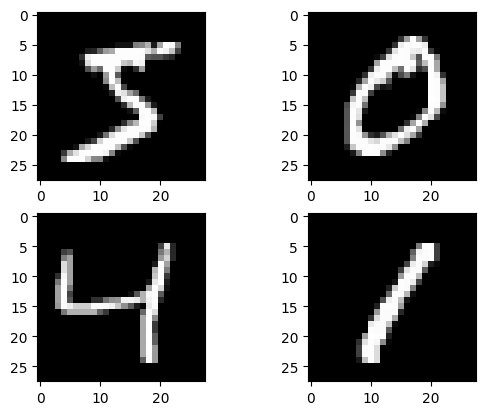

In [22]:
plt.subplot(221)
plt.imshow(MNIST_X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(MNIST_X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(MNIST_X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(MNIST_X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### Add Noise to Image

#### Gaussian Noise

###### Add Noise

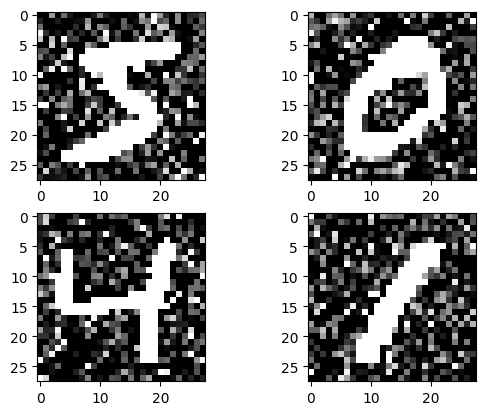

In [42]:
noise_factor = 0.25
MNIST_x_train_guassian = MNIST_X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=MNIST_X_train.shape)
MNIST_x_test_guassian = MNIST_X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=MNIST_X_test.shape)
MNIST_x_train_guassian = numpy.clip(MNIST_x_train_guassian, 0., 1.)
MNIST_x_test_guassian = numpy.clip(MNIST_x_test_guassian, 0., 1.)
plt.subplot(221)
plt.imshow(MNIST_x_train_guassian[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(MNIST_x_train_guassian[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(MNIST_x_train_guassian[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(MNIST_x_train_guassian[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

###### Formatting Image Shape

In [50]:
num_pixels = MNIST_x_train_guassian.shape[1] * MNIST_x_train_guassian.shape[2]
MNIST_x_train_guassian = MNIST_x_train_guassian.reshape(MNIST_x_train_guassian.shape[0], num_pixels).astype('float32')
MNIST_x_test_guassian = MNIST_x_test_guassian.reshape(MNIST_x_test_guassian.shape[0], num_pixels).astype('float32')
MNIST_x_train_guassian = MNIST_x_train_guassian / 255
MNIST_x_test_guassian = MNIST_x_test_guassian / 255
print(MNIST_x_train_guassian.shape)
print(MNIST_x_test_guassian.shape)

<class 'numpy.ndarray'>
(60000, 784)
(10000, 784)


#### Salt and Pepper Noise

##### Uniform Noise

###### Add Noise

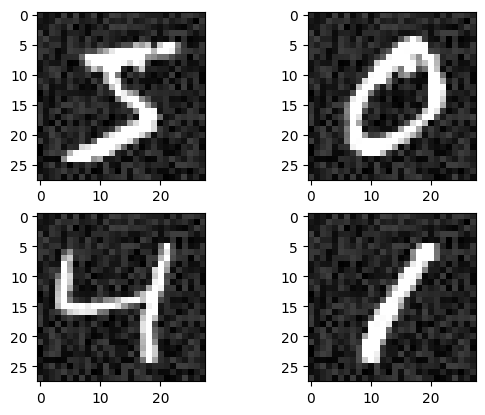

In [51]:
noise_factor = 0.25
uni_noise=np.zeros((28,28),dtype=np.uint8)
cv2.randu(uni_noise,0,255)
uni_noise=(uni_noise*noise_factor).astype(np.uint8)
MNIST_x_train_uniform=[]
MNIST_x_test_uniform=[]
for i in range(0,MNIST_X_train.shape[0]):
    img=cv2.add(MNIST_X_train[i],uni_noise)
    MNIST_x_train_uniform.append(img)
for i in range(0,MNIST_X_test.shape[0]):
    img=cv2.add(MNIST_X_test[i],uni_noise)
    MNIST_x_test_uniform.append(img)
MNIST_x_train_uniform = np.array(MNIST_x_train_uniform)
MNIST_x_test_uniform = np.array(MNIST_x_test_uniform)
plt.subplot(221)
plt.imshow(MNIST_x_train_uniform[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(MNIST_x_train_uniform[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(MNIST_x_train_uniform[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(MNIST_x_train_uniform[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

###### Formatting Image Shape

In [52]:
num_pixels = MNIST_x_train_uniform.shape[1] * MNIST_x_train_uniform.shape[2]
MNIST_x_train_uniform = MNIST_x_train_uniform.reshape(MNIST_x_train_uniform.shape[0], num_pixels).astype('float32')
MNIST_x_test_uniform = MNIST_x_test_uniform.reshape(MNIST_x_test_uniform.shape[0], num_pixels).astype('float32')
MNIST_x_train_uniform = MNIST_x_train_uniform / 255
MNIST_x_test_uniform = MNIST_x_test_uniform / 255
print(MNIST_x_train_uniform.shape)
print(MNIST_x_test_uniform.shape)

(60000, 784)
(10000, 784)


#### Quantization Noise

#### Random Noise

###### Add Noise

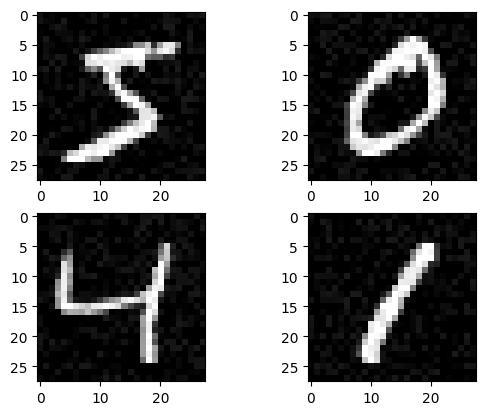

In [57]:
noise_factor = 0.25
MNIST_x_train_random=[]
MNIST_x_test_random=[]
intensity = noise_factor*100
for i in range(0,MNIST_X_train.shape[0]):
    noisy_image = MNIST_X_train[i].copy()
    noise = np.random.randint(-intensity, intensity + 1, noisy_image.shape)
    noisy_image = np.clip(noisy_image + noise, 0, 255).astype(np.uint8)
    MNIST_x_train_random.append(noisy_image)
for i in range(0,MNIST_X_test.shape[0]):
    noisy_image = MNIST_X_test[i].copy()
    noise = np.random.randint(-intensity, intensity + 1, noisy_image.shape)
    noisy_image = np.clip(noisy_image + noise, 0, 255).astype(np.uint8)
    MNIST_x_test_random.append(noisy_image)
MNIST_x_train_random = np.array(MNIST_x_train_random)
MNIST_x_test_random = np.array(MNIST_x_test_random)
plt.subplot(221)
plt.imshow(MNIST_x_train_random[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(MNIST_x_train_random[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(MNIST_x_train_random[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(MNIST_x_train_random[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

###### Formatting Image Shape

In [58]:
num_pixels = MNIST_x_train_random.shape[1] * MNIST_x_train_random.shape[2]
MNIST_x_train_random = MNIST_x_train_random.reshape(MNIST_x_train_random.shape[0], num_pixels).astype('float32')
MNIST_x_test_random = MNIST_x_test_uniform.reshape(MNIST_x_test_random.shape[0], num_pixels).astype('float32')
MNIST_x_train_random = MNIST_x_train_random / 255
MNIST_x_test_random = MNIST_x_test_random / 255
print(MNIST_x_train_random.shape)
print(MNIST_x_test_random.shape)

(60000, 784)
(10000, 784)


#### Periodic Noise

## DAE Architecture

### Architecture 1

In [ ]:
# create model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

### Architecture 2

## Network

### Training

In [ ]:
# Training model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)

### Evaluation

#### Plot Original vs Reconstructed Images

In [ ]:
# Final evaluation of the model
pred = model.predict(x_test_noisy)
X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()

#### Plot graphs between KL-Divergence and noise-architecture combinations